In [1]:
import sys
sys.path.append('../')

In [2]:
import mixgauss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.io import savemat
from sklearn.mixture import GaussianMixture
from IPython.display import HTML

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
def load_data(n=50):
    x1 = np.random.randn(n, 2) * 0.8
    x2 = np.random.randn(n, 2) * 0.6 + np.array([1.5, 2.4])
    X = np.vstack((x1, x2))
    y = np.zeros(n*2, dtype=np.int32)
    y[n:] = 1
    return X, y

In [4]:
np.random.seed(2)
X, y = load_data()

(-2.442054952900659, 4.279710962076988, -2.1813621269234056, 4.257656494962165)

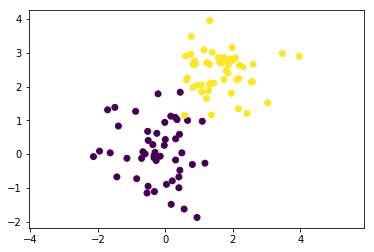

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')

In [6]:
class FrameUpdater:
    def __init__(self, X):
        self.clr = mixgauss.MixtureGaussian(2, seed=4)
        self.clr.on_start_fit(X)
        self.llhs = []
    
    def __call__(self, i, *hs):
        h1, h2 = hs
        self.clr.step(i)
        self.llhs.append(self.clr.llh)
        h1.set_array(self.clr.R.argmax(axis=1))
        h2.set_data(np.vstack((range(len(self.llhs)), self.llhs)))
        return h1, h2

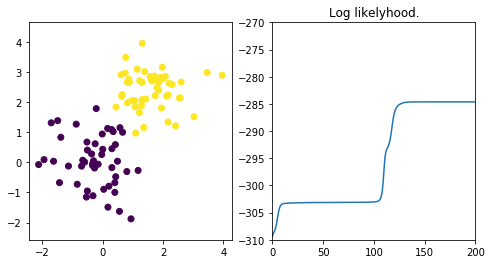

In [7]:
n_steps = 200
updater = FrameUpdater(X)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

h1 = axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].axis('equal')

h2, = axes[1].plot([], [])
axes[1].set_xlim([0, n_steps])
axes[1].set_ylim([-310, -270])
axes[1].set_title('Log likelyhood.')

ani = animation.FuncAnimation(fig, updater, fargs=(h1, h2), interval=100, blit=True, frames=n_steps)
HTML(ani.to_html5_video())